Code for New York City

In [16]:
# import the csv for new york
import matplotlib.pyplot as plt
import pandas as pd
import datetime as datetime
from pyprojroot import here

In [17]:
df = pd.read_csv(here('data/db/original/world_air_quality_index/new-york, usa-air-quality.csv'), na_values=' ')
print(df)

           date   pm25    o3   no2   co
0      2020/5/2     15  34.0   5.0  1.0
1      2020/5/3     21  43.0   9.0  2.0
2      2020/5/4     36  36.0  12.0  1.0
3      2020/5/5     21  37.0  10.0  1.0
4      2020/5/6     16  32.0  17.0  1.0
...         ...    ...   ...   ...  ...
2304  2014/3/28     42   NaN   NaN  NaN
2305  2014/3/29     64   NaN   NaN  NaN
2306  2014/3/30     32   NaN   NaN  NaN
2307  2014/3/31     18   NaN   NaN  NaN
2308   2014/4/1     28   NaN   NaN  NaN

[2309 rows x 5 columns]


In [18]:
df.columns
newdf=df[['date', ' no2']]
newdf.head(10)

,date,no2
0,2020/5/2,5.0
1,2020/5/3,9.0
2,2020/5/4,12.0
3,2020/5/5,10.0
4,2020/5/6,17.0
5,2020/5/7,14.0
6,2020/5/8,8.0
7,2020/5/9,NaN
8,2020/4/2,6.0
9,2020/4/3,6.0


In [21]:
newdf['date'] = pd.to_datetime(newdf['date'], format='%Y/%m/%d')

<ipython-input-21-2a6618479725>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['date'] = pd.to_datetime(newdf['date'], format='%Y/%m/%d')


In [24]:
newdf=newdf.dropna()

In [26]:
newdf

,date,no2
0,2020-05-02,5.0
1,2020-05-03,9.0
2,2020-05-04,12.0
3,2020-05-05,10.0
4,2020-05-06,17.0
...,...,...
794,2018-01-30,14.0
795,2018-01-31,19.0
796,2018-02-01,28.0
797,2018-02-02,17.0


In [31]:
newdf = newdf.loc[newdf.date > '2019-09-01']

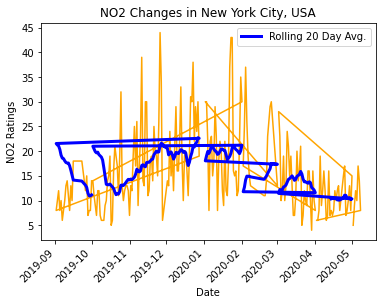

In [32]:
#make visualization
rolling_ave = 20
plt.plot(newdf['date'], newdf[' no2'],color='orange')
plt.plot(newdf['date'], newdf[' no2'].rolling(rolling_ave).mean(), 
         label='Rolling {} Day Avg.'.format(rolling_ave),color='blue', linewidth=3)
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('NO2 Ratings')
plt.title('NO2 Changes in New York City, USA')
plt.legend()
plt.show()

Code for Wuhan

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as datetime
df = pd.read_csv (r'C:\Users\mitch\covid19\data\db\working\wuhan-air-quality.csv')
no2_lvl=[]
date=[]
print(df)

          date  pm25  pm10   o3  no2  so2  co
0    4/17/2020   136                         
1    4/16/2020   100    66   75   23   17   9
2    4/15/2020   107    50   68   30    9   7
3    4/14/2020   101    51   59   30   10   7
4    4/13/2020   118    46   63   28    5   6
..         ...   ...   ...  ...  ...  ...  ..
224   9/5/2019   117    55  119   25   10  25
225   9/4/2019    93    51   76   18    8  12
226   9/3/2019   121    42   65   16    7  14
227   9/2/2019   118    53   95   23    8  12
228   9/1/2019    78    49   50   26    6  10

[229 rows x 7 columns]


In [2]:
df.columns
newdf=df[['date', ' no2']]
newdf.head(10)

,date,no2
0,4/17/2020,
1,4/16/2020,23
2,4/15/2020,30
3,4/14/2020,30
4,4/13/2020,28
5,4/12/2020,18
6,4/11/2020,9
7,4/10/2020,14
8,4/9/2020,38
9,4/8/2020,30


In [3]:
for no2 in newdf[' no2']:
    if no2 == " ":
        no2_lvl.append('NaN')
    else:
        no2_lvl.append(no2)
print(len(no2_lvl))

229


In [4]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['no2_new'] = no2_lvl
df_new = df[df.no2_new != 'NaN'].reset_index(drop=True)
df_new['no2_new']=df_new['no2_new'].astype(int)

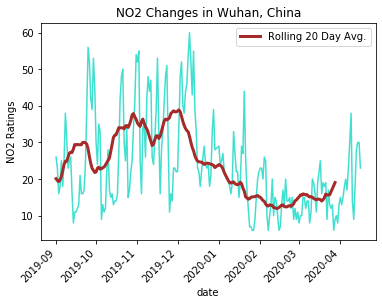

In [5]:
rolling_ave=20
plt.plot(df_new['date'], df_new['no2_new'], color='turquoise')
plt.plot(df_new['date'], df_new['no2_new'].rolling(rolling_ave).mean(), 
         label='Rolling {} Day Avg.'.format(rolling_ave), color='brown', linewidth=3)
plt.title('NO2 Changes in Wuhan, China')
plt.xlabel('date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('NO2 Ratings')
plt.legend()
plt.show()

Code for Milan

In [6]:
import matplotlib.pyplot as plt
import datetime as datetime
import pandas as pd
df = pd.read_csv(r'C:\Users\mitch\covid19\data\db\working\milano-senato, lombardia, italy-air-quality.csv')
no2_lvl=[]
date=[]
print(df)

          date  pm25  pm10  no2  co
0    4/15/2020    53               
1    4/14/2020    53    20   13    
2    4/13/2020    38    18   16    
3    4/12/2020    59    12   18    
4    4/11/2020    59    24   30    
..         ...   ...   ...  ...  ..
221   9/5/2019    38    28   27    
222   9/4/2019          22   36    
223   9/3/2019    55         16    
224   9/2/2019    57    17   22    
225   9/1/2019    55    24   18    

[226 rows x 5 columns]


In [7]:
df.columns
new_df=df[['date', ' no2']]
new_df.head(10)

,date,no2
0,4/15/2020,
1,4/14/2020,13
2,4/13/2020,16
3,4/12/2020,18
4,4/11/2020,30
5,4/10/2020,32
6,4/9/2020,31
7,4/8/2020,31
8,4/7/2020,49
9,4/6/2020,32


In [8]:
for no2 in new_df[' no2']:
    if no2==" ":
        no2_lvl.append('NaN')
    else:
        no2_lvl.append(no2)
print(len(no2_lvl))

226


In [9]:
df['date']=pd.to_datetime(df['date'], format='%m/%d/%Y')
df['no2_new']= no2_lvl
df_new=df[df.no2_new != 'NaN'].reset_index(drop=True)
df_new['no2_new']=df_new['no2_new'].astype(int)

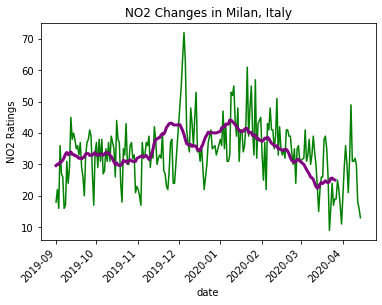

In [10]:
rolling_ave=20
plt.plot(df_new['date'], df_new['no2_new'], color='green')
plt.plot(df_new['date'], df_new['no2_new'].rolling(rolling_ave).mean(), 
         label='Rolling {} Day Avg.'.format(rolling_ave), color='purple', linewidth=3)
plt.title('NO2 Changes in Milan, Italy')
plt.xlabel('date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('NO2 Ratings')
plt.show()